In [2]:
import tensorflow as tf
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D

import numpy as np
from matplotlib import pyplot as plt

from keras.utils import np_utils
import cv2

from keras import backend as K

K.set_image_data_format('channels_first')
%matplotlib inline


In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(x_train.shape[0], 1, 28, 28).astype('float32')
x_test = x_test.reshape(x_test.shape[0], 1, 28, 28).astype('float32')

#Convertendo os valores entre 0 e 1

x_train = x_train / 255
x_test = x_test / 255

#Convertendo em matriz para categorizar os dados
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

num_classes = y_test.shape[1]


In [4]:
model = Sequential()

#Camadas
model.add(Conv2D(30, (5, 5), input_shape=(1, 28, 28), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(15, (3, 3), input_shape=(1, 28, 28), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())

#Neurônios da rede
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(num_classes, activation='softmax', name='predict'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 24, 24)        780       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 30, 12, 12)        0         
_________________________________________________________________
dropout (Dropout)            (None, 30, 12, 12)        0         
_________________________________________________________________
flatten (Flatten)            (None, 4320)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               553088    
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2

In [5]:
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=200)

Epoch 1/10


InvalidArgumentError:  Default MaxPoolingOp only supports NHWC on device type CPU
	 [[node sequential/max_pooling2d/MaxPool (defined at <ipython-input-5-31f1ff57e8b0>:1) ]] [Op:__inference_train_function_937]

Function call stack:
train_function


In [6]:
scores = model.evaluate(x_test, y_test, verbose=0)
print("\nacc: %.2f%%" % (scores[1]*100))

InvalidArgumentError:  Default MaxPoolingOp only supports NHWC on device type CPU
	 [[node sequential/max_pooling2d/MaxPool (defined at <ipython-input-6-0f036c1bfd8c>:1) ]] [Op:__inference_test_function_1129]

Function call stack:
test_function


DIGITE O NOME DA IMAGEM: number_two.png


TypeError: Image data of dtype object cannot be converted to float

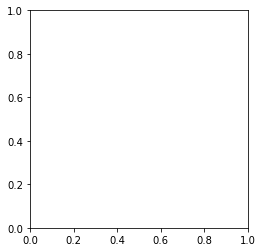

In [10]:
img_nome = input("DIGITE O NOME DA IMAGEM: ")
img_pred = cv2.imread(img_nome)
plt.imshow(img_pred, cmap='gray')

In [8]:
if img_pred.shape != [28, 28]:
    img2 = cv2.resize(img_pred, (28, 28))
    img_pred = img.reshape(28, 28, -1)
else:
    img_pred = img_pred.reshape(28, 28, -1)
    
img_pred = img_pred.reshape(1, 1, 28, 28)

NameError: name 'img_pred' is not defined

In [9]:
pred = model.predict_classes(img_pred)
pred_probabidade = model.predict_proba(img_pred)

pred_probabilidade = "%.2f%%" % (pred_probabilidade[0][pred]*100)

print(pred[0], "com probabilidade de ", pred_probabilidade)
                                       

NameError: name 'img_pred' is not defined